In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import  image_dataset_from_directory

In [3]:
picture_size = 48
folder_path = "images/images/"

# display images

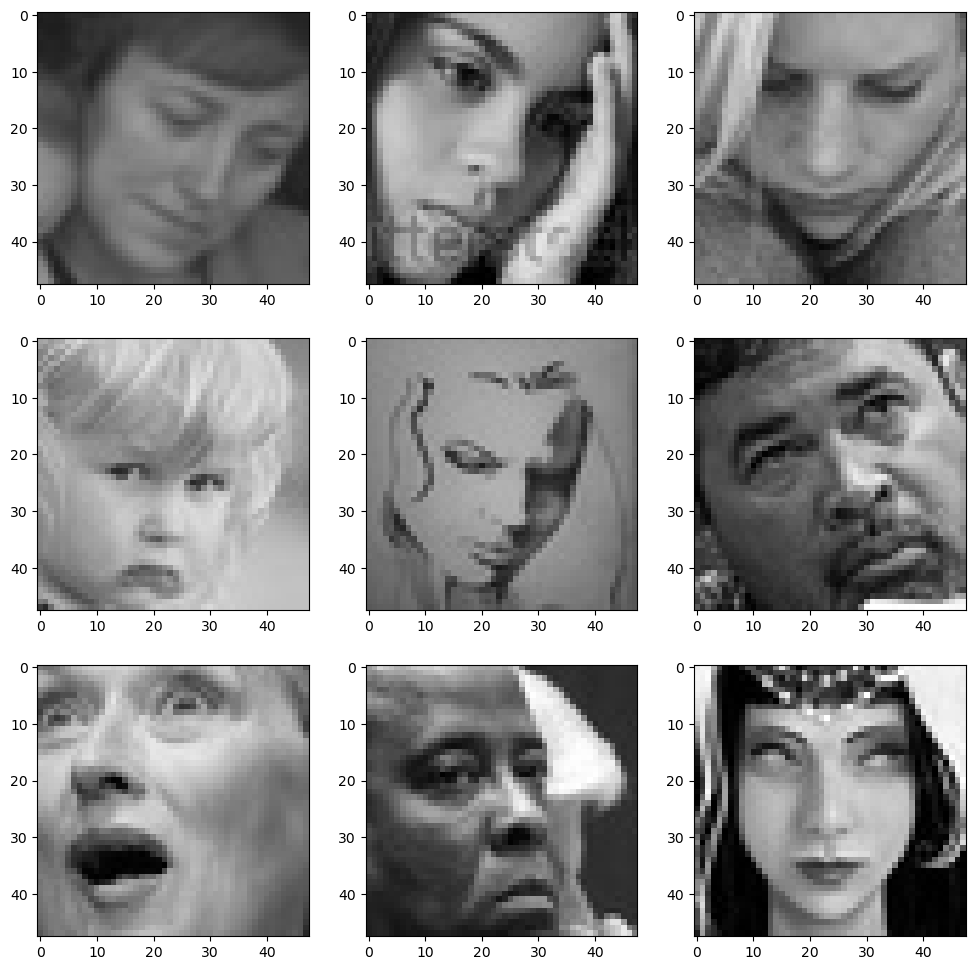

In [4]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i] )
    plt.imshow(img)

plt.show()

# load images

In [5]:
from tensorflow.keras.utils import  image_dataset_from_directory
train_set= image_dataset_from_directory(
    folder_path+"train",
    image_size=(48,48),
    batch_size=128,
    label_mode="categorical",
    class_names=['angry','disgust','fear','happy','neutral', 'sad', 'surprise']
)

Found 28821 files belonging to 7 classes.


In [6]:
from tensorflow.keras.utils import  image_dataset_from_directory
test_set= image_dataset_from_directory(
    folder_path+"validation",
    image_size=(48,48),
    batch_size=128,
    label_mode="categorical",
    class_names=['angry','disgust','fear','happy','neutral', 'sad', 'surprise']
)

Found 7066 files belonging to 7 classes.


In [7]:
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from keras.layers import Dense, Dropout, GlobalMaxPooling2D

# Create and compile model
model = Sequential()
model.add(EfficientNetB2(input_shape=(48, 48, 3), include_top=False))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))

In [9]:

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("modelen2.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]


model.compile(loss='categorical_crossentropy',
             optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [10]:


history = model.fit(train_set, validation_data = test_set, epochs = 50,callbacks=callbacks_list,shuffle=True)


Epoch 1/50
226/226 [==============================] - 1615s 5s/step - loss: 1.6975 - accuracy: 0.3870 - val_loss: 1.6659 - val_accuracy: 0.4567 - lr: 0.0010
Epoch 2/50
226/226 [==============================] - 3695s 16s/step - loss: 1.2152 - accuracy: 0.5413 - val_loss: 1.1932 - val_accuracy: 0.5587 - lr: 0.0010
Epoch 3/50
226/226 [==============================] - 1016s 4s/step - loss: 1.0346 - accuracy: 0.6132 - val_loss: 1.1179 - val_accuracy: 0.5935 - lr: 0.0010
Epoch 4/50
226/226 [==============================] - 1619s 7s/step - loss: 0.8836 - accuracy: 0.6748 - val_loss: 1.2230 - val_accuracy: 0.5778 - lr: 0.0010
Epoch 5/50
226/226 [==============================] - 2807s 12s/step - loss: 0.7745 - accuracy: 0.7173 - val_loss: 1.2615 - val_accuracy: 0.5995 - lr: 0.0010
Epoch 6/50
226/226 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.7491Restoring model weights from the end of the best epoch: 3.

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.000

In [11]:
model.save("mymodelen.h5")

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


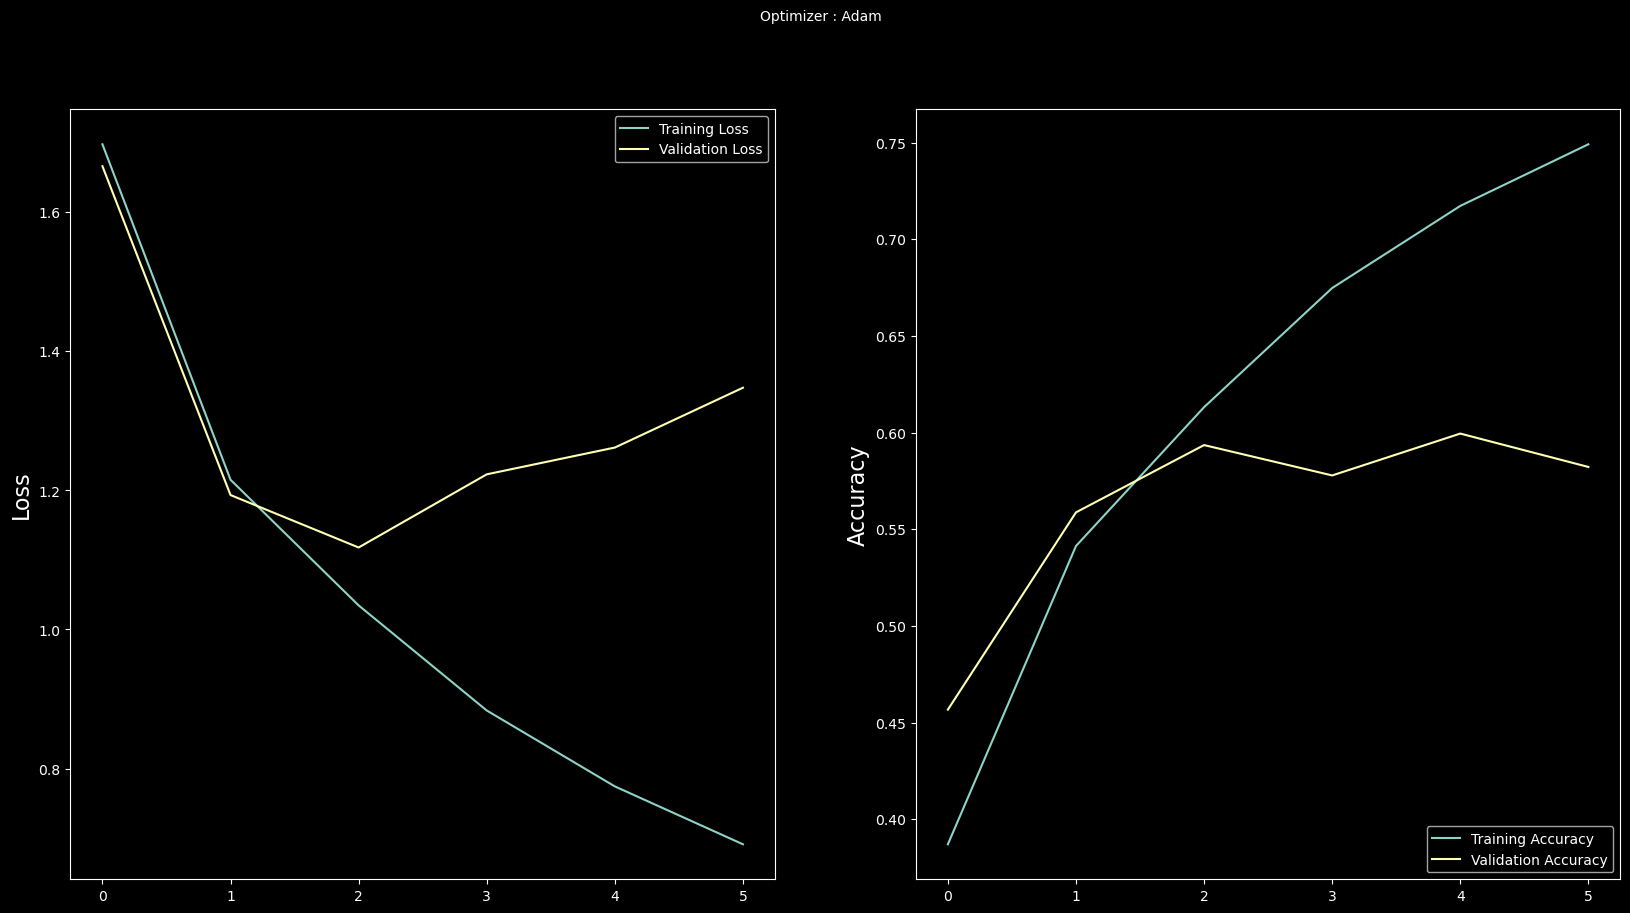

In [12]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


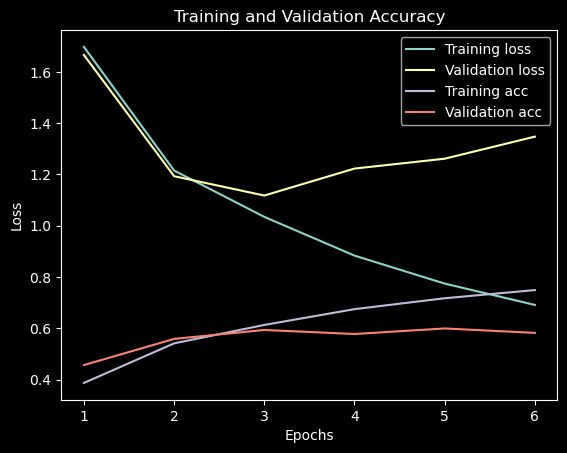

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()